# Credit Risk Assessment 
## Assess whether a credit applicant represents a credit risk based on given information

## Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Import Data and Explore

In [17]:
df = pd.read_csv('dataset_31_credit-g.csv')

#from keras.utils import to_categorical
#encoded = to_categorical(y)
df.T.head(24)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
checking_status,'<0','0<=X<200','no checking','<0','<0','no checking','no checking','0<=X<200','no checking','0<=X<200',...,'no checking','no checking','<0','<0','no checking','no checking','<0','no checking','<0','0<=X<200'
duration,6,48,12,42,24,36,24,36,12,30,...,12,15,18,36,12,12,30,12,45,45
credit_history,'critical/other existing credit','existing paid','critical/other existing credit','existing paid','delayed previously','existing paid','existing paid','existing paid','existing paid','critical/other existing credit',...,'critical/other existing credit','all paid','existing paid','existing paid','existing paid','existing paid','existing paid','existing paid','existing paid','critical/other existing credit'
purpose,radio/tv,radio/tv,education,furniture/equipment,'new car',education,furniture/equipment,'used car',radio/tv,'new car',...,education,radio/tv,radio/tv,furniture/equipment,'new car',furniture/equipment,'used car',radio/tv,radio/tv,'used car'
credit_amount,1169,5951,2096,7882,4870,9055,2835,6948,3059,5234,...,3565,1569,1936,3959,2390,1736,3857,804,1845,4576
savings_status,'no known savings','<100','<100','<100','<100','no known savings','500<=X<1000','<100','>=1000','<100',...,'no known savings','100<=X<500','no known savings','<100','no known savings','<100','<100','<100','<100','100<=X<500'
employment,'>=7','1<=X<4','4<=X<7','4<=X<7','1<=X<4','1<=X<4','>=7','1<=X<4','4<=X<7',unemployed,...,'<1','>=7','4<=X<7',unemployed,'>=7','4<=X<7','1<=X<4','>=7','1<=X<4',unemployed
installment_commitment,4,2,2,2,3,2,3,2,2,4,...,2,4,2,4,4,3,4,4,4,3
personal_status,'male single','female div/dep/mar','male single','male single','male single','male single','male single','male single','male div/sep','male mar/wid',...,'male single','male single','male mar/wid','male single','male single','female div/dep/mar','male div/sep','male single','male single','male single'
other_parties,none,none,none,guarantor,none,none,none,none,none,none,...,none,none,none,none,none,none,none,none,none,none


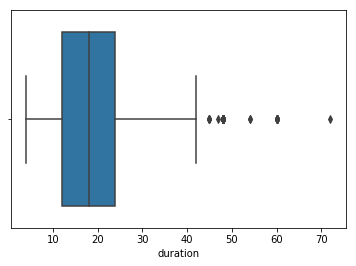

In [6]:
sns.boxplot(df.duration)

In [ ]:
#one way to encode:
from keras.utils import to_categorical
encoded = to_categorical(df.purpose)

In [7]:
df.count()

checking_status           1000
duration                  1000
credit_history            1000
purpose                   1000
credit_amount             1000
savings_status            1000
employment                1000
installment_commitment    1000
personal_status           1000
other_parties             1000
residence_since           1000
property_magnitude        1000
age                       1000
other_payment_plans       1000
housing                   1000
existing_credits          1000
job                       1000
num_dependents            1000
own_telephone             1000
foreign_worker            1000
class                     1000
dtype: int64

In [8]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_status           1000 non-null object
duration                  1000 non-null int64
credit_history            1000 non-null object
purpose                   1000 non-null object
credit_amount             1000 non-null int64
savings_status            1000 non-null object
employment                1000 non-null object
installment_commitment    1000 non-null int64
personal_status           1000 non-null object
other_parties             1000 non-null object
residence_since           1000 non-null int64
property_magnitude        1000 non-null object
age                       1000 non-null int64
other_payment_plans       1000 non-null object
housing                   1000 non-null object
existing_credits          1000 non-null int64
job                       1000 non-null object
num_dependents            1000 non-null int64
own_telephone             1000 non-null object
foreign_

In [10]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [11]:
df.isnull().sum() # no null or Nan values.

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

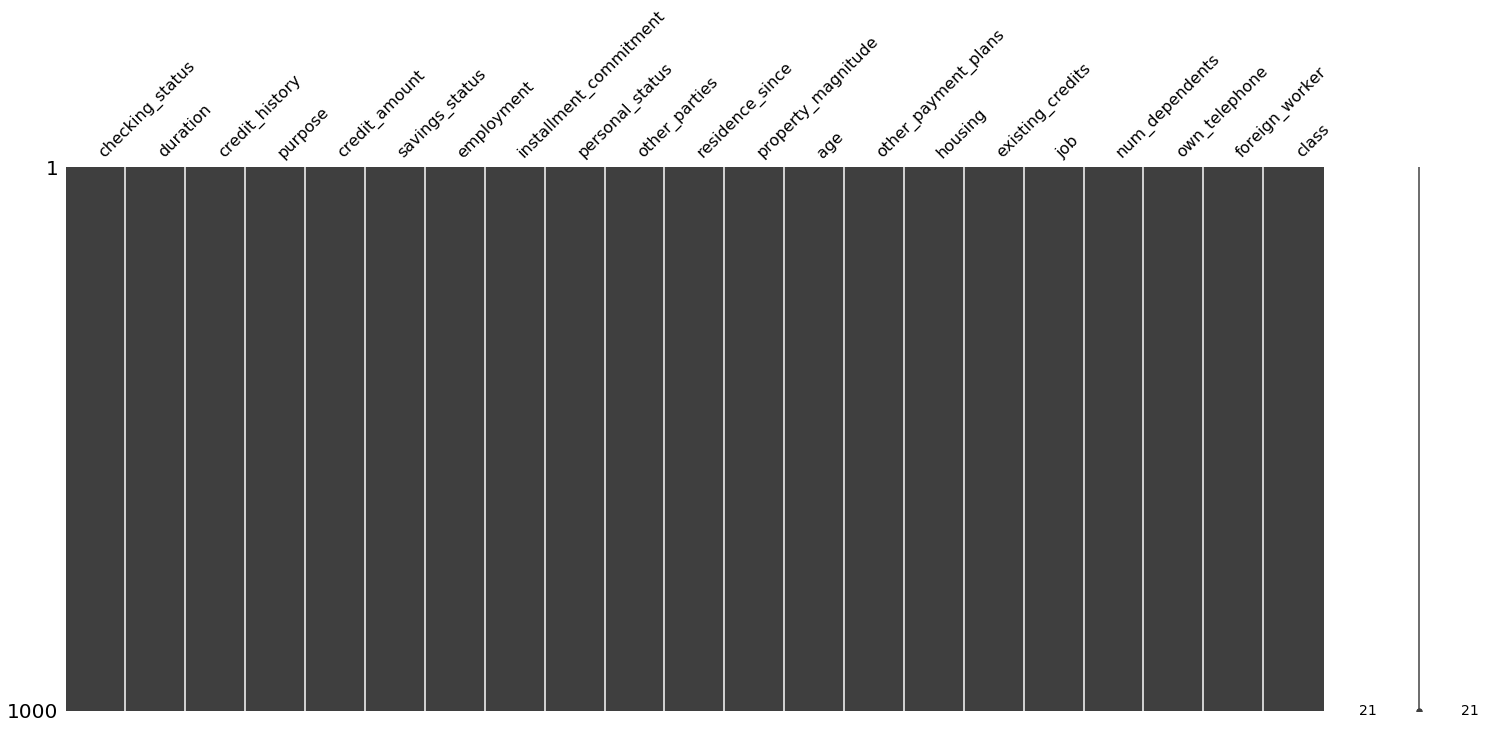

In [12]:
import missingno as msno
msno.matrix(df)  # just to visualize. no missing values.

In [13]:
df.isnull().any()

checking_status           False
duration                  False
credit_history            False
purpose                   False
credit_amount             False
savings_status            False
employment                False
installment_commitment    False
personal_status           False
other_parties             False
residence_since           False
property_magnitude        False
age                       False
other_payment_plans       False
housing                   False
existing_credits          False
job                       False
num_dependents            False
own_telephone             False
foreign_worker            False
class                     False
dtype: bool

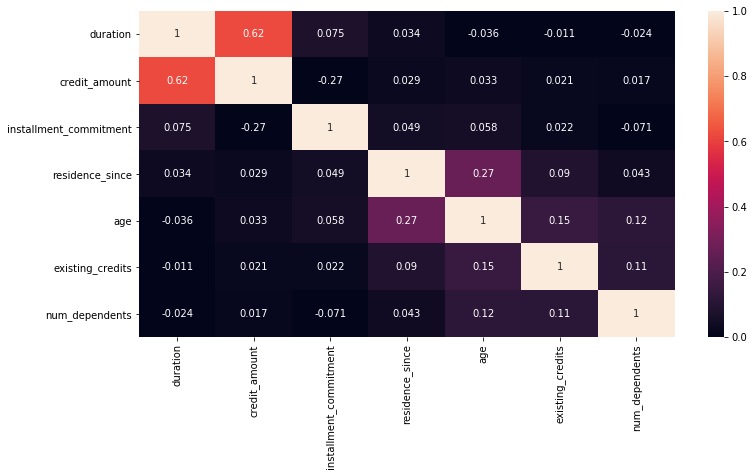

In [14]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))
sns.heatmap(df.corr(), annot=True, ax = ax, vmin = 0, vmax = 1)

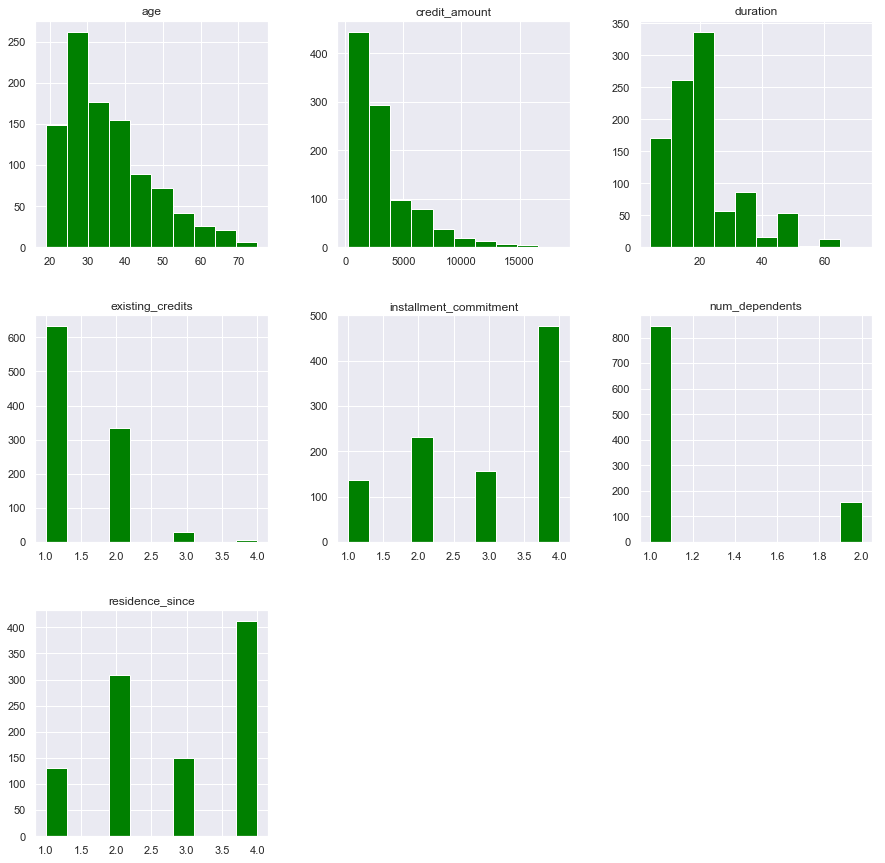

In [15]:
sns.set()
df.hist(figsize=(15,15), color='green')
plt.show()

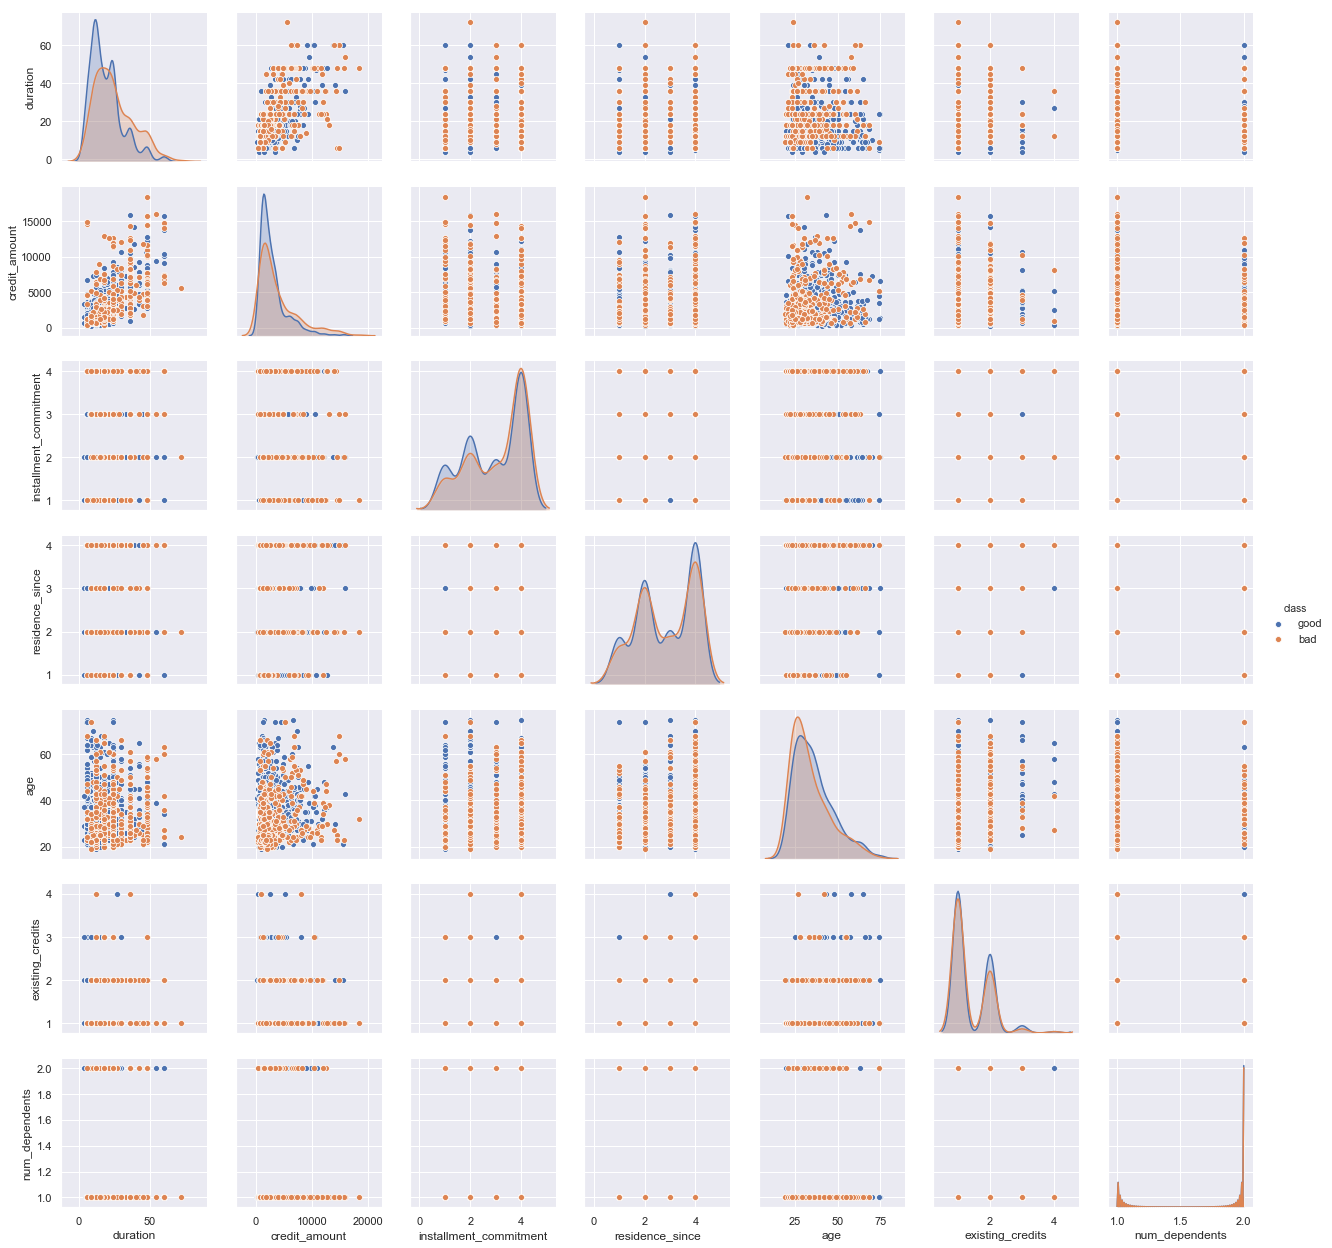

In [16]:
sns.pairplot(df, hue = 'class')

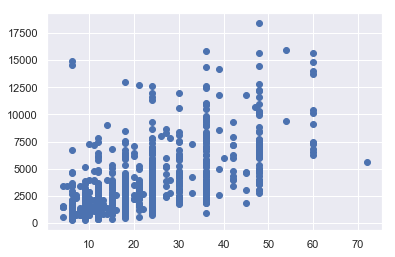

In [17]:
plt.scatter(y='credit_amount',x='duration',data=df)

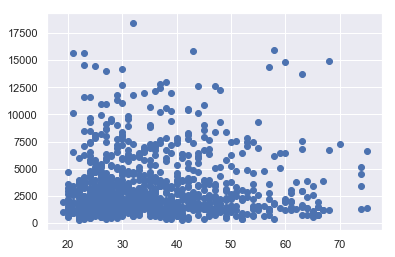

In [18]:
plt.scatter(y='credit_amount',x='age',data=df)

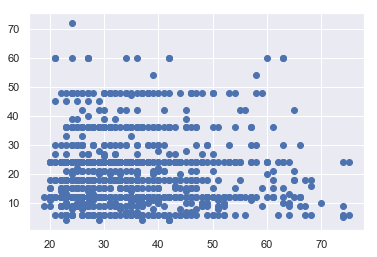

In [19]:
plt.scatter(y='duration',x='age',data=df)

In [20]:
#How can i see the 3 features in 3 different colors???

ValueError: 'c' argument must either be valid as mpl color(s) or as numbers to be mapped to colors. Here c = ['good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad' 'bad'
 'bad' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'bad'
 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'good'
 'good' 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good'
 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'bad' 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good'
 'bad' 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'
 'good' 'bad' 'bad' 'good' 'bad' 'good' 'bad' 'bad' 'good' 'good' 'good'
 'good' 'bad' 'bad' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good'
 'bad' 'bad' 'bad' 'good' 'bad' 'bad' 'good' 'bad' 'good' 'bad' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'bad' 'good'
 'good' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'bad'
 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'bad'
 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad'
 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'bad' 'good' 'good'
 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad' 'bad' 'good' 'bad'
 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'bad'
 'good' 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'bad' 'bad' 'bad' 'bad' 'bad' 'good'
 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad'
 'good' 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad'
 'good' 'good' 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'bad' 'good'
 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'
 'good' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good'
 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'bad' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad'
 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'bad' 'good' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'bad' 'bad'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'bad'
 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'bad'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'good'
 'bad' 'good' 'bad' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good'
 'good' 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'bad' 'bad' 'good' 'bad'
 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad'
 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'bad' 'bad'
 'bad' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'good'
 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'good'
 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'bad' 'good' 'good' 'bad'
 'good' 'good' 'good' 'bad' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good'
 'bad' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'bad' 'bad' 'bad'
 'good' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good'
 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad'
 'bad' 'good' 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'bad'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad' 'bad' 'bad'
 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'bad'
 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'good'
 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good'
 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good'
 'good' 'bad' 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'good' 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'good' 'good'
 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'bad' 'bad' 'good'
 'good' 'bad' 'bad' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'bad'
 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good'
 'good' 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'bad'
 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'bad' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'bad' 'bad' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'bad'
 'bad' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad'
 'bad' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'bad' 'bad' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'good' 'good'
 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'bad' 'bad'
 'bad' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'].

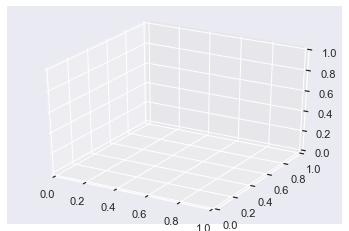

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = df['age']
ys = df['credit_amount']
zs = df['duration']

ax.scatter(xs, ys, zs, c=df['class'], cmap = plt.hot(),s=100, alpha=0.8, edgecolors='w')

ax.set_xlabel('age')
ax.set_ylabel('credit_amount')
ax.set_zlabel('duration')


ValueError: 'c' argument must either be valid as mpl color(s) or as numbers to be mapped to colors. Here c = ['good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad' 'bad'
 'bad' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'bad'
 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'good'
 'good' 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good'
 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'bad' 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good'
 'bad' 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'
 'good' 'bad' 'bad' 'good' 'bad' 'good' 'bad' 'bad' 'good' 'good' 'good'
 'good' 'bad' 'bad' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good'
 'bad' 'bad' 'bad' 'good' 'bad' 'bad' 'good' 'bad' 'good' 'bad' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'bad' 'good'
 'good' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'bad'
 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'bad'
 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad'
 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'bad' 'good' 'good'
 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad' 'bad' 'good' 'bad'
 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'bad'
 'good' 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'bad' 'bad' 'bad' 'bad' 'bad' 'good'
 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad'
 'good' 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad'
 'good' 'good' 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'bad' 'good'
 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'
 'good' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good'
 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'bad' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad'
 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'bad' 'good' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'bad' 'bad'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'bad'
 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'bad'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'good'
 'bad' 'good' 'bad' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good'
 'good' 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'bad' 'bad' 'good' 'bad'
 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad'
 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'bad' 'bad'
 'bad' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'good'
 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'good'
 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'bad' 'good' 'good' 'bad'
 'good' 'good' 'good' 'bad' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good'
 'bad' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'bad' 'bad' 'bad'
 'good' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good'
 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad'
 'bad' 'good' 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'bad'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad' 'bad' 'bad'
 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'bad'
 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'good'
 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good'
 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good'
 'good' 'bad' 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'good' 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'good' 'good'
 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'bad' 'bad' 'good'
 'good' 'bad' 'bad' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'bad'
 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good'
 'good' 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'bad'
 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'bad' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'bad' 'bad' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'bad'
 'bad' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad'
 'bad' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'bad' 'bad' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'good' 'good'
 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'bad' 'bad'
 'bad' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'].

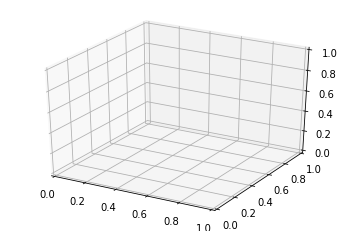

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = df['credit_amount']
ys = df['age']
zs = df['duration']

ax.scatter(xs, ys, zs, c=df['class'], cmap = plt.prism(),s=100, alpha=0.8, edgecolors='w')

ax.set_xlabel('age')
ax.set_ylabel('credit_amount')
ax.set_zlabel('duration')

ValueError: 'c' argument must either be valid as mpl color(s) or as numbers to be mapped to colors. Here c = ['good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad' 'bad'
 'bad' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'bad'
 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'good'
 'good' 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good'
 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'bad' 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good'
 'bad' 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'
 'good' 'bad' 'bad' 'good' 'bad' 'good' 'bad' 'bad' 'good' 'good' 'good'
 'good' 'bad' 'bad' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good'
 'bad' 'bad' 'bad' 'good' 'bad' 'bad' 'good' 'bad' 'good' 'bad' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'bad' 'good'
 'good' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'bad'
 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'bad'
 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad'
 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'bad' 'good' 'good'
 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad' 'bad' 'good' 'bad'
 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'bad'
 'good' 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'bad' 'bad' 'bad' 'bad' 'bad' 'good'
 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad'
 'good' 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad'
 'good' 'good' 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'bad' 'good'
 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'
 'good' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good'
 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'bad' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad'
 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'bad' 'good' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'bad' 'bad'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'bad'
 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'bad'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'good'
 'bad' 'good' 'bad' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good'
 'good' 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'bad' 'bad' 'good' 'bad'
 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad'
 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'bad' 'bad'
 'bad' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'good'
 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'good'
 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'bad' 'good' 'good' 'bad'
 'good' 'good' 'good' 'bad' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good'
 'bad' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'bad' 'bad' 'bad'
 'good' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good'
 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad'
 'bad' 'good' 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'bad'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad' 'bad' 'bad'
 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'bad'
 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'good'
 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good'
 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good'
 'good' 'bad' 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'good' 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'good' 'good'
 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'bad' 'bad' 'good'
 'good' 'bad' 'bad' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'bad'
 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good'
 'good' 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'bad'
 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'bad' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'bad' 'bad' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'bad'
 'bad' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad'
 'bad' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'bad' 'bad' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'good' 'good'
 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'bad' 'bad'
 'bad' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'].

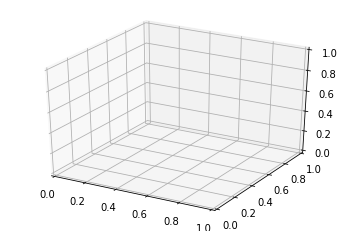

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = df['credit_amount']
ys = df['age']
zs = df['duration']

ax.scatter(xs, ys, zs,  c=df['class'], cmap = plt.prism(),s=100, alpha=0.8, edgecolors='w')


ax.set_xlabel('duration')
ax.set_ylabel('credit_amount')
ax.set_zlabel('age')

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def scat3D(Fa, Fb,Fc):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    xs = df[Fa][df['class'] == 0]
    ys = df[Fb][df['class'] == 0]
    zs = df[Fc][df['class'] == 0]

    us = df[Fa][df['class'] == 1]
    vs = df[Fb][df['class'] == 1]
    ws = df[Fc][df['class'] == 1]
    
    ax.scatter(xs, ys, zs, label = 'Good', c='orange' , s=100, alpha=0.8, edgecolors='w')
    ax.scatter(us, vs, ws, label = 'Bad', c='b' ,s=100, alpha=0.8, edgecolors='w')

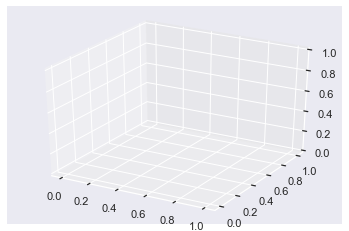

In [26]:
scat3D('class','duration','credit_amount')

In [ ]:
# How can i use this plot to detect outliers????

TypeError: unsupported operand type(s) for /: 'str' and 'int'

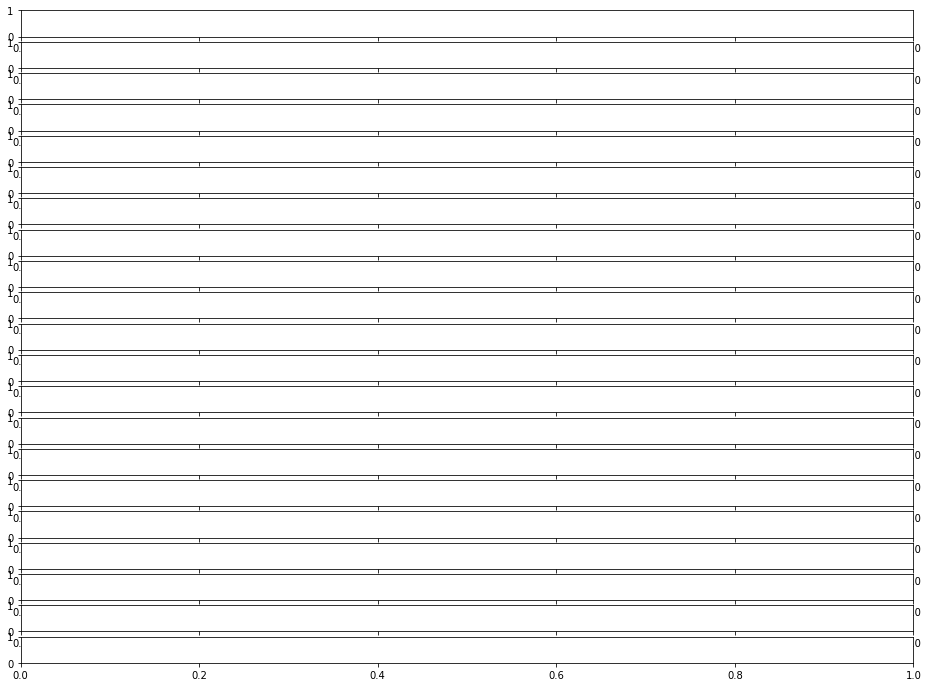

In [6]:
col_names = ['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status',
             'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 
             'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone','foreign_worker', 'class']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

   sns.distplot(df[col_val], hist=True, ax=ax[i])
   ax[i].set_title('Freq dist '+col_val, fontsize=10)
   ax[i].set_xlabel(col_val, fontsize=8)
   ax[i].set_ylabel('Count', fontsize=8)

In [ ]:
col_names = [ 'duration', 'credit_amount', 'age']
fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

   sns.distplot(df[col_val], hist=True, ax=ax[i])
   ax[i].set_title('Freq dist '+col_val, fontsize=10)
   ax[i].set_xlabel(col_val, fontsize=8)
   ax[i].set_ylabel('Count', fontsize=8)

In [ ]:
# Just for fun!!!

In [ ]:
import plotly.tools as tls
import plotly.plotly as py
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected= True)
cf.go_offline()

In [ ]:
df.iplot() #make no sense 

In [ ]:
df.sum().iplot(kind='bar')

In [ ]:
df.iplot(kind='box')

In [ ]:
# import figure factory
import plotly.figure_factory as ff
# prepare data
#dataframe = timesData[timesData.year == 2015]
data2015 = df.loc[:,["age","credit_amount", "duration"]]
#data2015["index"] = np.arange(1,len(data2015)+1)
# scatter matrix
fig = ff.create_scatterplotmatrix(data2015, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat',
                                  height=700, width=700)
iplot(fig)

In [ ]:
df.corr()['age'].sort_values(ascending=False)

In [ ]:
df.corr()['duration'].sort_values(ascending=False)

In [ ]:
df.corr()['credit_amount'].sort_values(ascending=False)

In [ ]:
df['age'].unique()

In [ ]:
df['duration'].unique()

In [ ]:
df['credit_amount'].unique()

In [ ]:
df.groupby(['duration'])['age'].count()

In [ ]:
sns.countplot(x=df['age'])

In [ ]:
sns.countplot(x=df['duration'])

In [ ]:
sns.countplot(x=df['credit_amount'])

In [7]:
x_columns = 20
x = df.iloc[:, 0:x_columns].values
y = df.iloc[:, x_columns].values

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df[col].unique())) <= 21:
            # Train on the training data
            le.fit(df[col])
            # Transform both training and testing data
            df[col] = le.transform(df[col])
        
        
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

14 columns were label encoded.


In [11]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6,1,7,1169,4,3,4,3,2,...,2,67,1,1,2,3,1,1,1,1
1,0,48,3,7,5951,2,0,2,0,2,...,2,22,1,1,1,3,1,0,1,0
2,3,12,1,4,2096,2,1,2,3,2,...,2,49,1,1,1,2,2,0,1,1
3,1,42,3,5,7882,2,1,2,3,1,...,0,45,1,0,1,3,2,0,1,1
4,1,24,2,1,4870,2,0,3,3,2,...,1,53,1,0,2,3,2,0,1,0


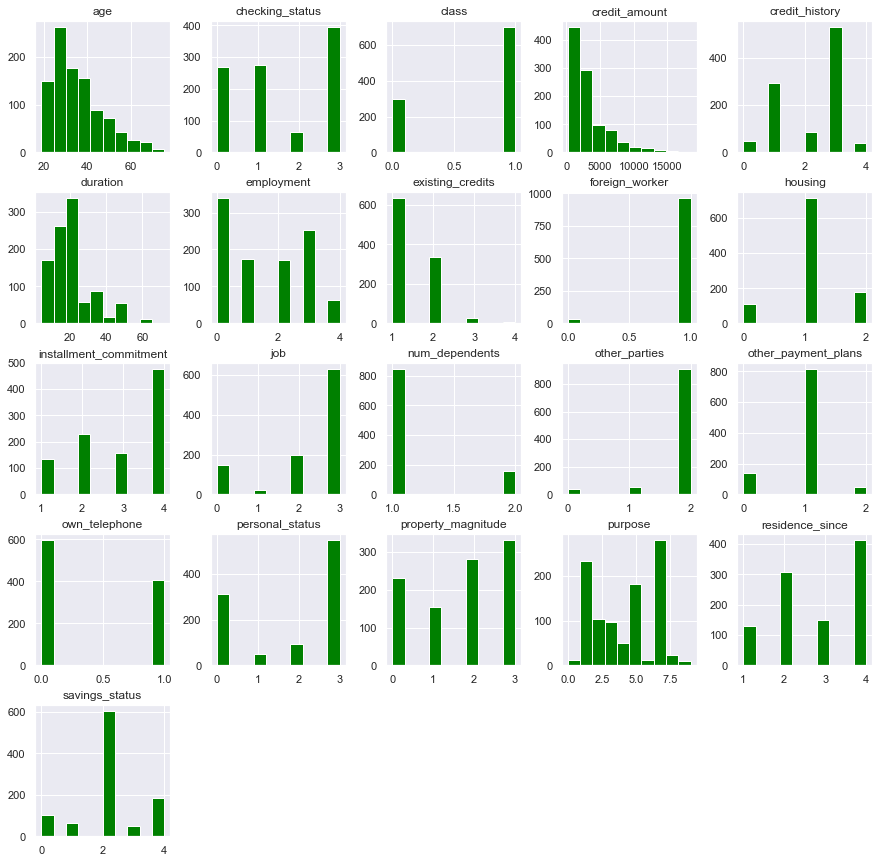

In [10]:
sns.set()
df.hist(figsize=(15,15), color='green')
plt.show()

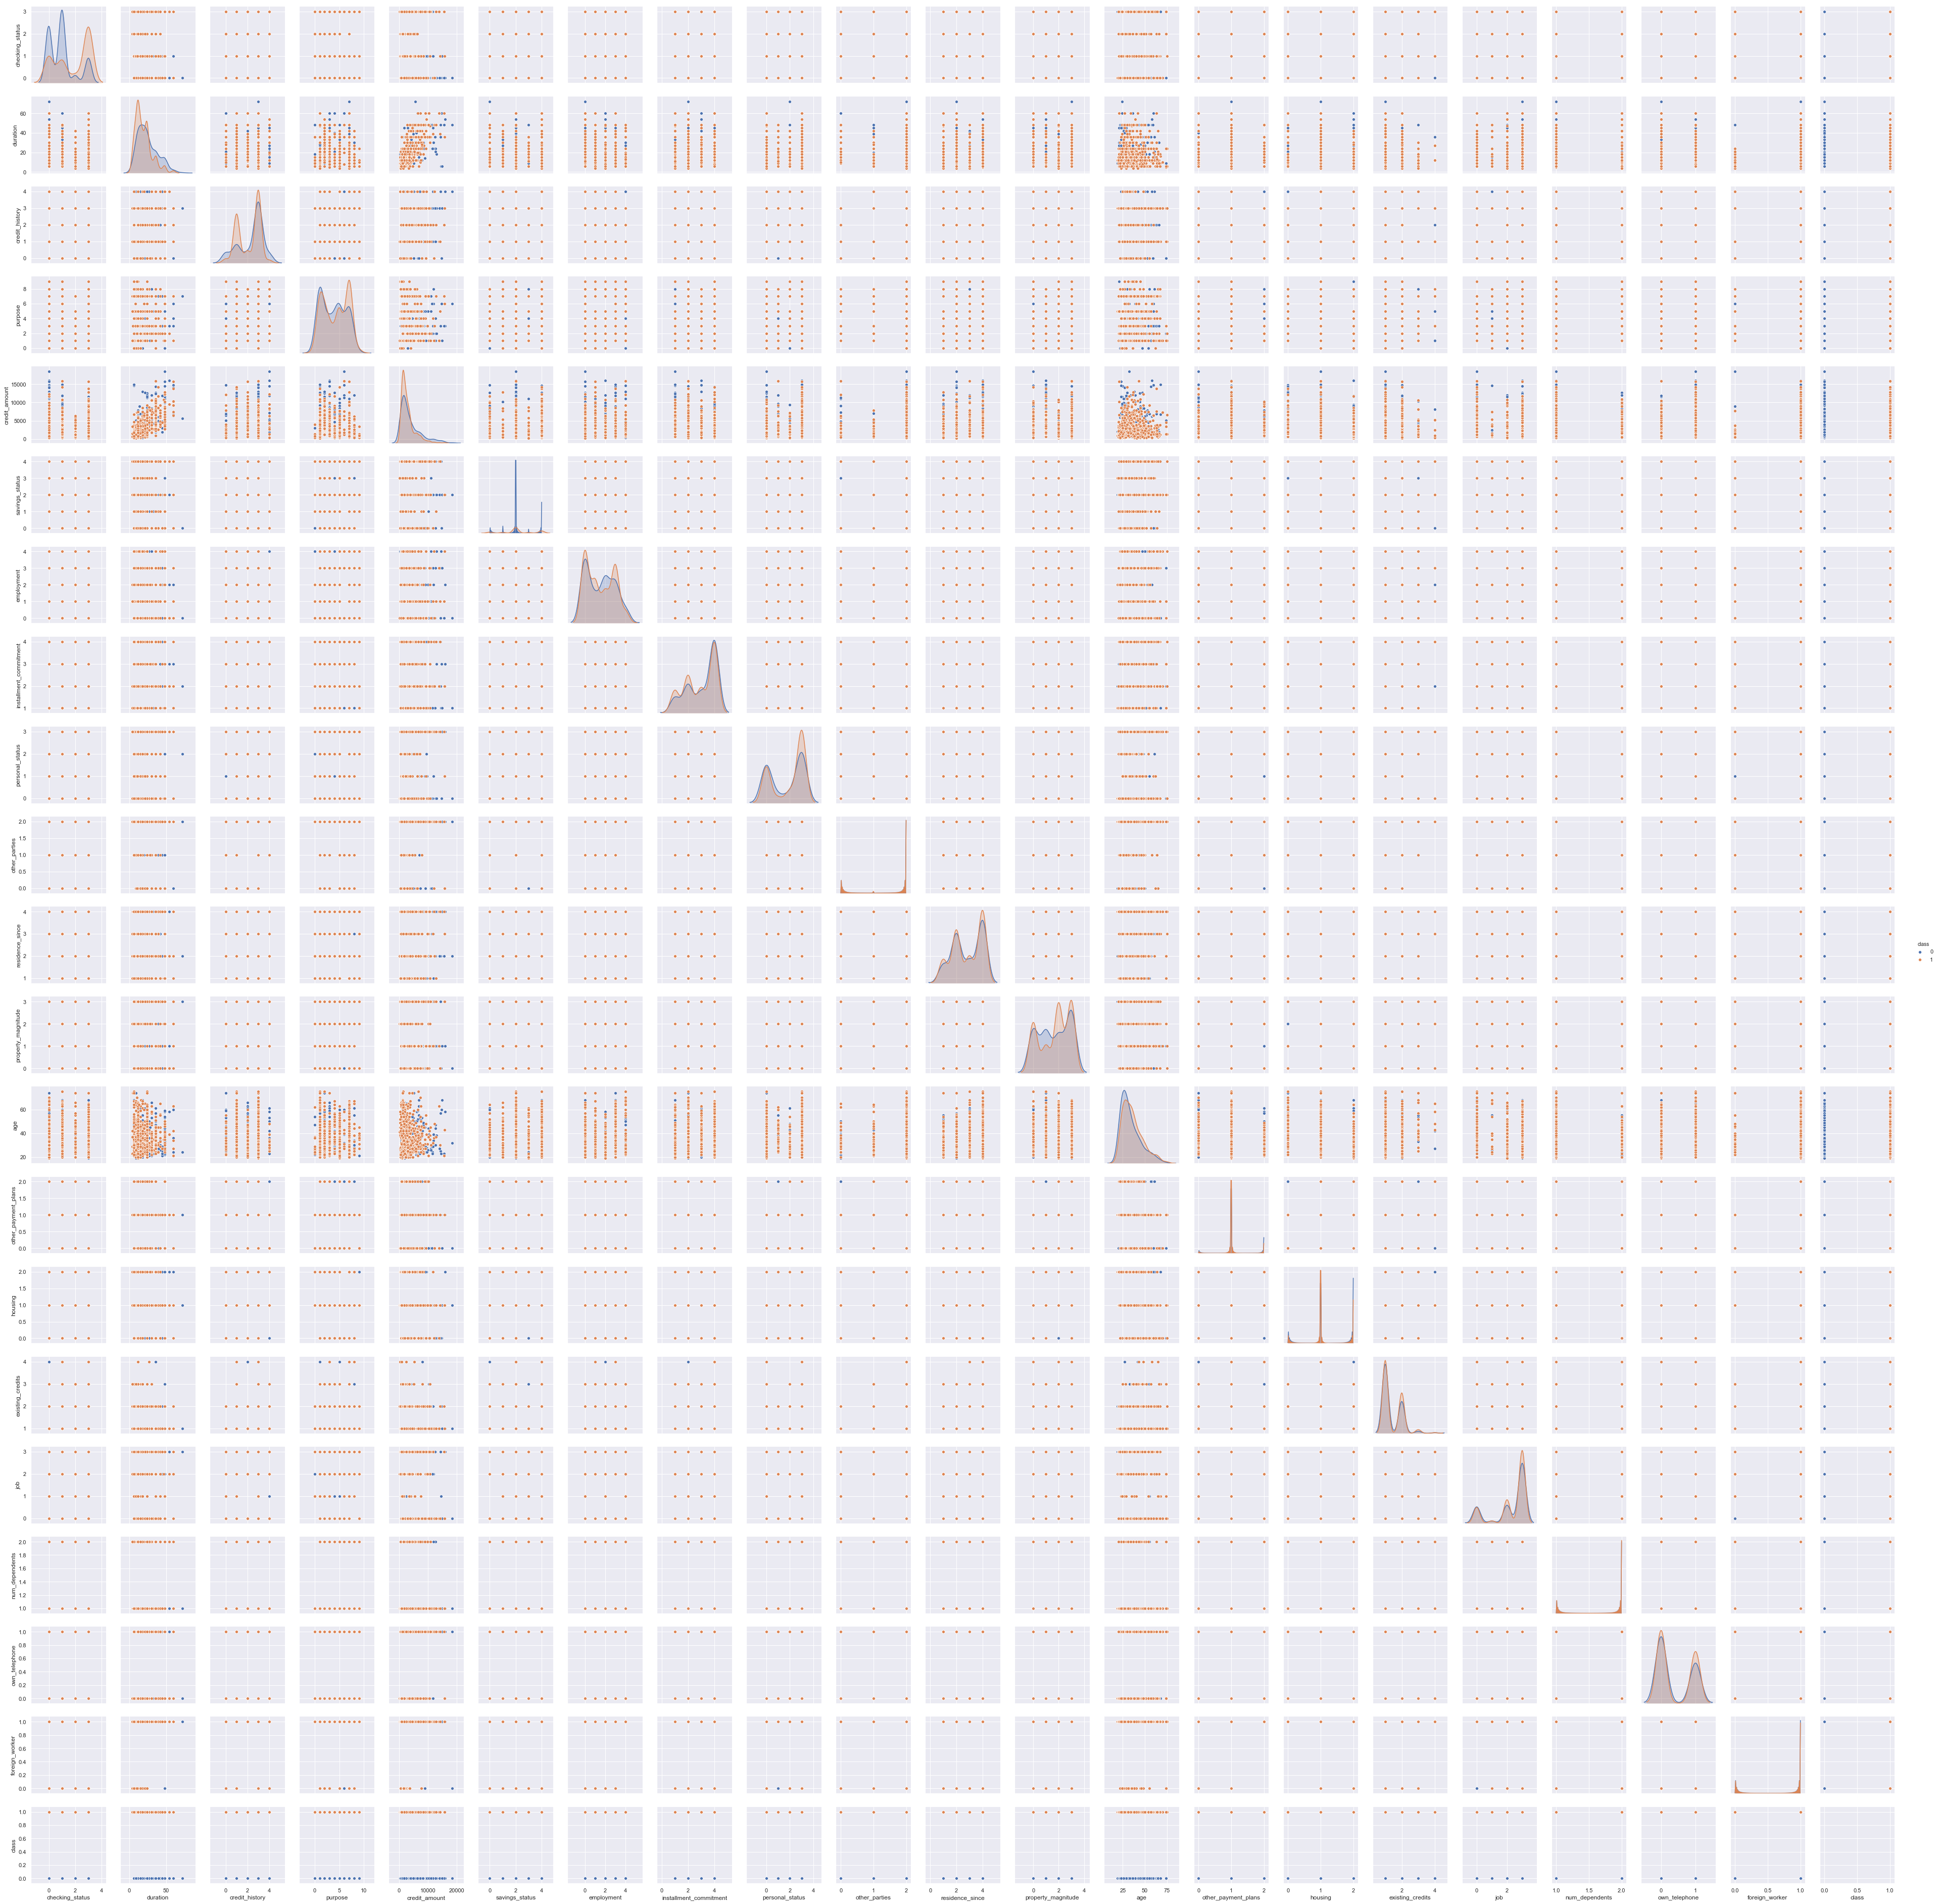

In [12]:
sns.pairplot(df, hue = 'class')

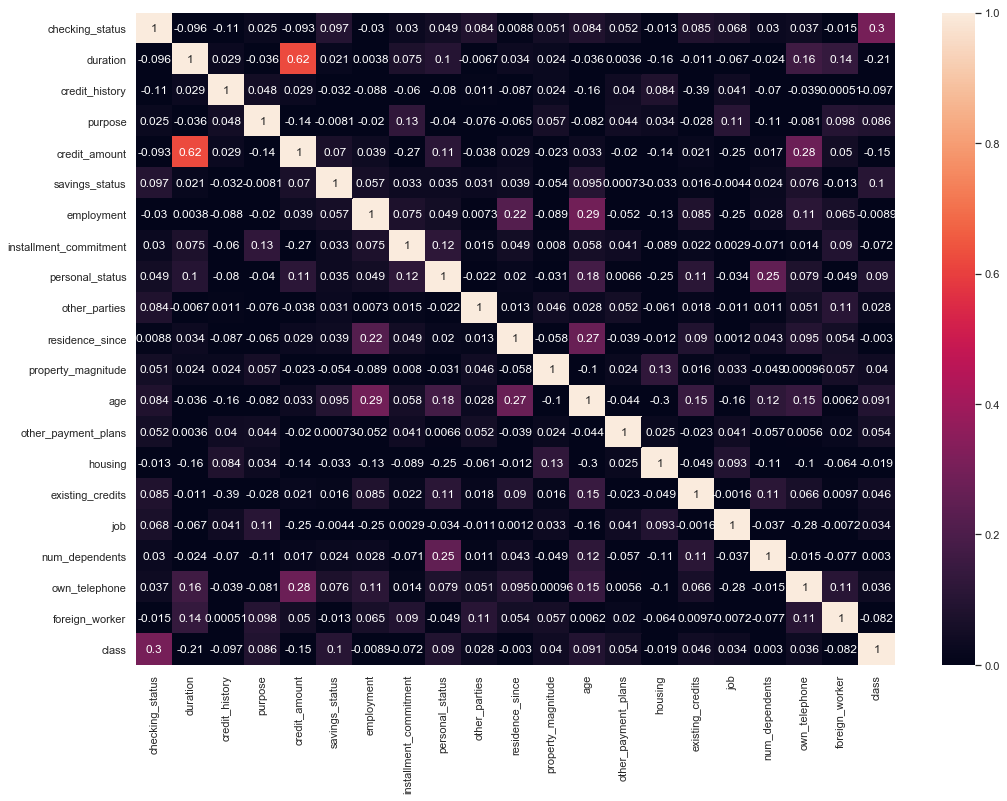

In [13]:
fig, ax = plt.subplots(1, 1, figsize = (17, 12))
sns.heatmap(df.corr(), annot=True, ax = ax, vmin = 0, vmax = 1)

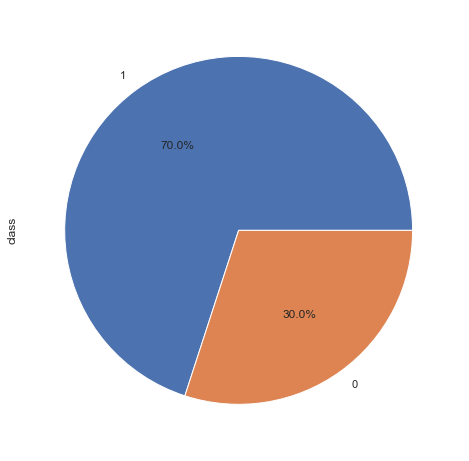

In [14]:
plt.figure(1, figsize=(8,8))
df['class'].value_counts().plot.pie(autopct="%1.1f%%")

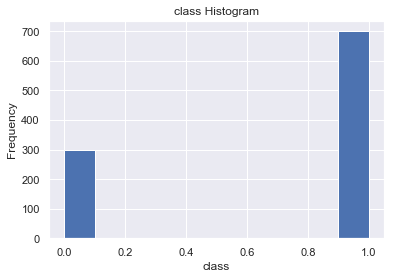

In [15]:
df['class'].plot.hist(title = 'class Histogram');
plt.xlabel('class');

# First Analysis

# Logistic Regression

In [ ]:
x_columns = 20
x = df.iloc[:, 0:x_columns].values
y = df.iloc[:, x_columns].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(model.score(x_test, y_test))

# SVM

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

from sklearn.svm import SVC
model = SVC(kernel ='linear', random_state = 0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(model.score(x_test, y_test))

# KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(model.score(x_test, y_test))

# Naive Bayes Classification

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = matrix.ravel()
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(model.score(x_test, y_test))

# Multinomial Naive Bayes Classification

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(model.score(x_test, y_test))

# Bernoulli Naive Bayes Classification

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB().fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(model.score(x_test, y_test))

# Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, criterion ='entropy', random_state = 0).fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = matrix.ravel()


In [ ]:
print(matrix)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(model.score(x_test, y_test))

# Decision Tree 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', random_state=0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = matrix.ravel()

In [ ]:
print(matrix)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(model.score(x_test, y_test))

# #Trying to cut out anolmalies 

In [ ]:
plt.scatter(y='class',x='duration',data=df)

In [ ]:
plt.scatter(y='class',x='credit_amount',data=df)

In [ ]:
plt.scatter(y='credit_amount',x='duration',data=df)

In [ ]:
#Delete entries with less than 17500 duration
df = df[df['credit_amount'] < 17500]

In [ ]:
plt.scatter(y='class',x='credit_amount',data=df)

In [ ]:
df = df[df['duration'] < 70]

In [ ]:
plt.scatter(y='class',x='duration',data=df)

In [ ]:
plt.scatter(y='credit_amount',x='duration',data=df)

# Logistic Regression

In [ ]:
x_columns = 20
x = df.iloc[:, 0:x_columns].values
y = df.iloc[:, x_columns].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(model.score(x_test, y_test))

# Random Forest 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, criterion ='entropy', random_state = 0).fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = matrix.ravel()

In [ ]:
print(matrix)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(model.score(x_test, y_test))

In [ ]:
#Delete entries with less than 17500 duration
df = df[df['credit_amount'] < 14000]

In [ ]:
df = df[df['duration'] < 50]

In [ ]:
plt.scatter(y='credit_amount',x='duration',data=df)

# Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, criterion ='entropy', random_state = 0).fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = matrix.ravel()

In [ ]:
print(matrix)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(model.score(x_test, y_test))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(6,), activation='relu', solver='adam', batch_size=10, max_iter=100, random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(matrix)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(model.score(x_test, y_test))

In [ ]:
from keras.models import Sequential
model = Sequential()
from keras.layers import Dense
input_layer = Dense(units=6, activation='relu', kernel_initializer='uniform')
model.add(input_layer)
hidden_layer = Dense(units=6, activation='relu', kernel_initializer='uniform')
model.add(hidden_layer)
output_layer = Dense(units=1, activation='sigmoid', kernel_initializer='uniform')
model.add(output_layer)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size = 10, epochs = 100)
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(matrix)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(model.score(x_test, y_test))

In [ ]:
import seaborn as sns
sns.boxplot(df['age'])

In [ ]:
import seaborn as sns
sns.boxplot(df['age'])

In [ ]:
#Delete entries with less than 17500 duration
df = df[df['age'] < 60]

In [ ]:
import seaborn as sns
sns.boxplot(df['credit_amount'])

In [ ]:
#Delete entries with less than 17500 duration
df = df[df['credit_amount'] < 7500]

In [ ]:
import seaborn as sns
sns.boxplot(df['credit_amount'])

In [ ]:
import seaborn as sns
sns.boxplot(df['duration'])

In [ ]:
#Delete entries with less than 17500 duration
df = df[df['duration'] < 40]

In [ ]:
import seaborn as sns
sns.boxplot(df['duration'])

In [ ]:
plt.scatter(y='credit_amount',x='duration',data=df)

In [ ]:
x_columns = 20
x = df.iloc[:, 0:x_columns].values
y = df.iloc[:, x_columns].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, criterion ='entropy', random_state = 0).fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = matrix.ravel()

In [ ]:
print(matrix)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(model.score(x_test, y_test))

In [ ]:
import seaborn as sns
sns.boxplot(df['credit_amount'])

In [ ]:
#Delete entries with less than 17500 duration
df = df[df['credit_amount'] < 6000]

In [ ]:
import seaborn as sns
sns.boxplot(df['credit_amount'])

In [ ]:
x_columns = 20
x = df.iloc[:, 0:x_columns].values
y = df.iloc[:, x_columns].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, criterion ='entropy', random_state = 0).fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = matrix.ravel()
print(matrix)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(model.score(x_test, y_test))

In [ ]:
catPlotDF= (df.loc[df['checking_status'].isin(['<0','0<=X<200','no checking', '>=200'])])

In [ ]:
colorFreqTable= catPlotDF['checking_status'].value_counts()

In [ ]:
list(colorFreqTable.index)

In [ ]:
colorFreqTable.values

In [ ]:
labelNames = list(colorFreqTable.index)

In [ ]:
positionsForBars = list(range(len(labelNames)))

In [ ]:
plt.bar(positionsForBars,colorFreqTable.values) # plot our bars
plt.xticks(positionsForBars,labelNames) # add lables
plt.title("XXX", fontweight="bold",fontsize=21)

In [ ]:
import seaborn as sns
sns.set(font_scale=1.5)

In [ ]:
sns.countplot(catPlotDF['checking_status'])

In [ ]:
f, axe = plt.subplots(1, 1,figsize=(12,5))
sns.boxplot(x=df['duration'],y=df['credit_amount'], ax=axe)
axe.yaxis.tick_left()

In [ ]:
f, axe = plt.subplots(1, 1,figsize=(12,5))
sns.boxplot(x=df['duration'],y=df['credit_amount'], ax=axe)
axe.yaxis.tick_left()